In [1]:
import pandas as pd
import numpy as np

In [2]:
field_ids_df=pd.read_csv("ukb_field_ids.csv")
def assign_type(type):
    
    if type=="‡": return "blob/bulk data"
    
    elif type=="†": return "compound data"
    
    elif type=="*": return "view only data"
    
    elif  type=="#": return "restricted data type"
    
    elif type is np.NaN : return "Misc data type"
    
       
field_ids_df['field_id_category'] = field_ids_df['Type'].apply(lambda x: assign_type(x))

In [3]:
field_ids_df=field_ids_df.drop(columns=['Type'])

In [5]:
# field_ids_df['field_id_category'].value_counts()
field_ids_df.to_csv("ukb_final_field_ids_december.csv")

In [4]:
field_ids_df['field_id_category'].value_counts()
# import zfield_ids_df.head(5)

Misc data type          4458
view only data            87
blob/bulk data            58
compound data              8
restricted data type       8
Name: field_id_category, dtype: int64

In [7]:
ukb_df_1=pd.read_csv("/ocean/projects/asc170022p/shared/Data/ukBiobank/meta_data_november_2021/ukb49570.csv", nrows=50)

In [6]:
new_column_list_1=ukb_df_1.columns.to_list()

In [8]:
ukb_df_2=pd.read_csv("/ocean/projects/asc170022p/shared/Data/ukBiobank/meta_data_november_2021/ukb49571.csv", nrows=50)

In [9]:
new_column_list_2=ukb_df_2.columns.to_list()

In [5]:
ukb_df_3=pd.read_csv("/ocean/projects/asc170022p/shared/Data/ukBiobank/meta_data_november_2021/ukb49572.csv", nrows=50)

In [10]:
new_column_list_3=ukb_df_3.columns.to_list()

In [8]:
with open('new_column_list_1.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % item for item in new_column_list_1)
    
with open('new_column_list_2.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % item for item in new_column_list_2)
    
with open('new_column_list_3.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % item for item in new_column_list_3)

## Long Combat UKBFS

2


In [1]:
with open('UKB_fs_folder_paths_march_2022.csv') as f:
    folder_paths = f.read().splitlines() 

In [2]:
fs_subject_list=[]
for path in folder_paths:
    fs_subject_list.append(path.split("/")[-3])

In [22]:
fs_subject_list_instance2=[]
fs_subject_list_instance3=[]
for path in folder_paths:
    subject=path.split("/")[-3]
    if path.split("/")[-2][-3]=="2":
        fs_subject_list_instance2.append(subject)
    else:
        fs_subject_list_instance3.append(subject)

In [26]:
fs_subject_list_instance2[:5]

['4980289', '4980289', '4980289', '1101836', '1026859']

In [23]:
len(fs_subject_list),len(fs_subject_list_instance2),len(fs_subject_list_instance3)

(33088, 30173, 2910)

In [24]:
def ukb_subject_sex(type):
    
    if type==0.0: return "F"
    
    else: return "M"

def ukb_subject_age(year):
    
    return int(2022-year)

def ukb_subject_age_at_scan(row):
    
    return int(row['Date_of_Brain_Scan'].year- row['Year_of_Birth'])

def parse_subject_id_from_path(path):
    return path.split("/")[-3]

def get_center(center):
    if center==11025.0: return "Cheadle"
    
    elif center==11026.0: return "Reading"

    elif center==11027.0: return "Newcastle"

In [28]:
import pandas as pd
#long_combat_df = pd.read_csv("/ocean/projects/asc170022p/shared/Data/ukBiobank/meta_data_november_2021/ukb49570.csv", usecols = ['eid','53-2.0','34-0.0','31-0.0','54-2.0'])

long_combat_df_inst2 = pd.read_csv("/ocean/projects/asc170022p/shared/Data/ukBiobank/meta_data_november_2021/ukb49570.csv", usecols = ['eid','53-2.0','34-0.0','31-0.0','54-2.0'])
long_combat_df_inst3 = pd.read_csv("/ocean/projects/asc170022p/shared/Data/ukBiobank/meta_data_november_2021/ukb49570.csv", usecols = ['eid','53-3.0','34-0.0','31-0.0','54-3.0'])

In [29]:
#long_combat_df=long_combat_df[long_combat_df['eid'].isin(fs_subject_list)]

long_combat_df_inst2=long_combat_df_inst2[long_combat_df_inst2['eid'].isin(fs_subject_list_instance2)]
long_combat_df_inst3=long_combat_df_inst3[long_combat_df_inst3['eid'].isin(fs_subject_list_instance3)]

In [30]:
#long_combat_df.shape

long_combat_df_inst2.shape, long_combat_df_inst3.shape

((30171, 5), (2910, 5))

In [31]:
#long_combat_df=long_combat_df.rename(columns={"eid":"Subject_ID","31-0.0": "Sex", "34-0.0": "Year_of_Birth", "53-2.0": "Date_of_Brain_Scan","54-2.0": "Assesment_Centre"})

long_combat_df_inst2=long_combat_df_inst2.rename(columns={"eid":"Subject_ID","31-0.0": "Sex", "34-0.0": "Year_of_Birth", "53-2.0": "Date_of_Brain_Scan","54-2.0": "Assesment_Centre"})
long_combat_df_inst3=long_combat_df_inst3.rename(columns={"eid":"Subject_ID","31-0.0": "Sex", "34-0.0": "Year_of_Birth", "53-3.0": "Date_of_Brain_Scan","54-3.0": "Assesment_Centre"})

In [32]:
long_combat_df_inst2.head(20)

,Subject_ID,Sex,Year_of_Birth,Date_of_Brain_Scan,Assesment_Centre
28,1000295,1.0,1958.0,2017-10-27,11027.0
38,1000397,0.0,1959.0,2018-03-07,11027.0
42,1000432,1.0,1956.0,2018-07-14,11025.0
58,1000591,1.0,1957.0,2019-07-09,11026.0
87,1000882,1.0,1959.0,2017-11-16,11025.0
174,1001753,0.0,1944.0,2016-10-11,11025.0
229,1002306,0.0,1953.0,2018-10-01,11027.0
259,1002603,0.0,1954.0,2019-09-14,11027.0
270,1002719,0.0,1957.0,2018-11-28,11027.0
281,1002824,0.0,1961.0,2018-08-05,11027.0


In [112]:
long_combat_df.Assesment_Centre.value_counts()

11025.0    570
11027.0    274
11026.0    131
Name: Assesment_Centre, dtype: int64

In [33]:
#long_combat_df['Assesment_Centre']= long_combat_df['Assesment_Centre'].apply(lambda x: get_center(x))
long_combat_df_inst2['Assesment_Centre']= long_combat_df_inst2['Assesment_Centre'].apply(lambda x: get_center(x))
long_combat_df_inst3['Assesment_Centre']= long_combat_df_inst3['Assesment_Centre'].apply(lambda x: get_center(x))

In [34]:
#long_combat_df=long_combat_df.reset_index(drop=True)

long_combat_df_inst2=long_combat_df_inst2.reset_index(drop=True)
long_combat_df_inst3=long_combat_df_inst3.reset_index(drop=True)

In [35]:
#long_combat_df['Date_of_Brain_Scan']= pd.to_datetime(long_combat_df['Date_of_Brain_Scan'])

long_combat_df_inst2['Date_of_Brain_Scan']= pd.to_datetime(long_combat_df_inst2['Date_of_Brain_Scan'])
long_combat_df_inst3['Date_of_Brain_Scan']= pd.to_datetime(long_combat_df_inst3['Date_of_Brain_Scan'])

In [40]:
long_combat_df_inst2.dtypes

Subject_ID                     int64
Sex                           object
Year_of_Birth                float64
Date_of_Brain_Scan    datetime64[ns]
Assesment_Centre              object
Age                            int64
Age_at_Scan                    int64
dtype: object

In [41]:
def get_folder_path2(subject):
    str_sub=str(subject)
    return "/ocean/projects/asc170022p/tighu/UKB_Freesurfer_March2022/"+str_sub+"/"+str_sub+"_20263_2_0"+"/FreeSurfer"

def get_folder_path3(subject):
    str_sub=str(subject)
    return "/ocean/projects/asc170022p/tighu/UKB_Freesurfer_March2022/"+str_sub+"/"+str_sub+"_20263_3_0"+"/FreeSurfer"

In [36]:
#long_combat_df['Sex'] = long_combat_df['Sex'].apply(lambda x: ukb_subject_sex(x))
#long_combat_df['Age'] = long_combat_df['Year_of_Birth'].apply(lambda x: ukb_subject_age(x))
#long_combat_df['Age_at_Scan'] = long_combat_df.apply(lambda x: ukb_subject_age_at_scan(x),axis=1)


long_combat_df_inst2['Sex'] = long_combat_df_inst2['Sex'].apply(lambda x: ukb_subject_sex(x))
long_combat_df_inst2['Age'] = long_combat_df_inst2['Year_of_Birth'].apply(lambda x: ukb_subject_age(x))
long_combat_df_inst2['Age_at_Scan'] = long_combat_df_inst2.apply(lambda x: ukb_subject_age_at_scan(x),axis=1)

long_combat_df_inst3['Sex'] = long_combat_df_inst3['Sex'].apply(lambda x: ukb_subject_sex(x))
long_combat_df_inst3['Age'] = long_combat_df_inst3['Year_of_Birth'].apply(lambda x: ukb_subject_age(x))
long_combat_df_inst3['Age_at_Scan'] = long_combat_df_inst3.apply(lambda x: ukb_subject_age_at_scan(x),axis=1)

In [42]:

long_combat_df_inst2['folder_path'] = long_combat_df_inst2['Subject_ID'].apply(lambda x: get_folder_path2(x))

long_combat_df_inst3['folder_path'] = long_combat_df_inst3['Subject_ID'].apply(lambda x: get_folder_path3(x))

In [34]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [48]:
long_combat_df_inst2.columns

Index(['Subject_ID', 'Sex', 'Year_of_Birth', 'Date_of_Brain_Scan', 'Assesment_Centre', 'Age', 'Age_at_Scan', 'folder_path'], dtype='object')

In [101]:
long_combat_df_inst3.head(5)

,Subject_ID,Sex,Year_of_Birth,Date_of_Brain_Scan,Assesment_Centre,Age,Age_at_Scan,folder_path
0,1000295,M,1958.0,2020-01-03,Newcastle,64,62,/ocean/projects/asc170022p/tighu/UKB_Freesurfe...
1,1010071,M,1965.0,2020-03-06,Cheadle,57,55,/ocean/projects/asc170022p/tighu/UKB_Freesurfe...
2,1013031,F,1961.0,2019-10-29,Newcastle,61,58,/ocean/projects/asc170022p/tighu/UKB_Freesurfe...
3,1020781,F,1955.0,2020-03-01,Newcastle,67,65,/ocean/projects/asc170022p/tighu/UKB_Freesurfe...
4,1021807,F,1951.0,2019-07-18,Cheadle,71,68,/ocean/projects/asc170022p/tighu/UKB_Freesurfe...


In [50]:
all_dfs = [long_combat_df_inst2, long_combat_df_inst3]

final_df_meta_data=pd.concat(all_dfs).reset_index(drop=True)

In [52]:
final_df_meta_data.head(10)

,Subject_ID,Sex,Year_of_Birth,Date_of_Brain_Scan,Assesment_Centre,Age,Age_at_Scan,folder_path
0,1000295,M,1958.0,2017-10-27,Newcastle,64,59,/ocean/projects/asc170022p/tighu/UKB_Freesurfe...
1,1000397,F,1959.0,2018-03-07,Newcastle,63,59,/ocean/projects/asc170022p/tighu/UKB_Freesurfe...
2,1000432,M,1956.0,2018-07-14,Cheadle,66,62,/ocean/projects/asc170022p/tighu/UKB_Freesurfe...
3,1000591,M,1957.0,2019-07-09,Reading,65,62,/ocean/projects/asc170022p/tighu/UKB_Freesurfe...
4,1000882,M,1959.0,2017-11-16,Cheadle,63,58,/ocean/projects/asc170022p/tighu/UKB_Freesurfe...
5,1001753,F,1944.0,2016-10-11,Cheadle,78,72,/ocean/projects/asc170022p/tighu/UKB_Freesurfe...
6,1002306,F,1953.0,2018-10-01,Newcastle,69,65,/ocean/projects/asc170022p/tighu/UKB_Freesurfe...
7,1002603,F,1954.0,2019-09-14,Newcastle,68,65,/ocean/projects/asc170022p/tighu/UKB_Freesurfe...
8,1002719,F,1957.0,2018-11-28,Newcastle,65,61,/ocean/projects/asc170022p/tighu/UKB_Freesurfe...
9,1002824,F,1961.0,2018-08-05,Newcastle,61,57,/ocean/projects/asc170022p/tighu/UKB_Freesurfe...


In [2]:
#concat meta data with the freesurfer features
home_directory="/ocean/projects/asc170022p/tighu/"
vol_csv= pd.read_csv(home_directory+"ukb_aseg_stats_volumes_march_2022.csv",sep='\t')
rh_csv=pd.read_csv(home_directory+"ukb_stats_rh_thicknesss_march_2022.csv")
lh_csv=pd.read_csv(home_directory+"ukb_stats_lh_thickness_march_2022.csv")

In [3]:
vol_csv.shape, rh_csv.shape , lh_csv.shape
df_list=[lh_csv,rh_csv,vol_csv]

In [16]:
lh_csv.shape,rh_csv.shape,vol_csv.shape

((33083, 38), (33083, 38), (33083, 67))

In [23]:
from functools import reduce
df_long_combat_merged = reduce(lambda  left,right: pd.merge(left,right,on=['folder_path'],
                                            how='left'), df_list)

In [35]:
df_long_combat_merged['folder_path'][60:80]

60    /ocean/projects/asc170022p/tighu/UKB_Freesurfe...
61    /ocean/projects/asc170022p/tighu/UKB_Freesurfe...
62    /ocean/projects/asc170022p/tighu/UKB_Freesurfe...
63    /ocean/projects/asc170022p/tighu/UKB_Freesurfe...
64    /ocean/projects/asc170022p/tighu/UKB_Freesurfe...
65    /ocean/projects/asc170022p/tighu/UKB_Freesurfe...
66    /ocean/projects/asc170022p/tighu/UKB_Freesurfe...
67    /ocean/projects/asc170022p/tighu/UKB_Freesurfe...
68    /ocean/projects/asc170022p/tighu/UKB_Freesurfe...
69    /ocean/projects/asc170022p/tighu/UKB_Freesurfe...
70    /ocean/projects/asc170022p/tighu/UKB_Freesurfe...
71    /ocean/projects/asc170022p/tighu/UKB_Freesurfe...
72    /ocean/projects/asc170022p/tighu/UKB_Freesurfe...
73    /ocean/projects/asc170022p/tighu/UKB_Freesurfe...
74    /ocean/projects/asc170022p/tighu/UKB_Freesurfe...
75    /ocean/projects/asc170022p/tighu/UKB_Freesurfe...
76    /ocean/projects/asc170022p/tighu/UKB_Freesurfe...
77    /ocean/projects/asc170022p/tighu/UKB_Frees

In [37]:
df_long_combat_merged[:20]

,folder_path,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,lh_lateraloccipital_thickness,lh_lateralorbitofrontal_thickness,lh_lingual_thickness,lh_medialorbitofrontal_thickness,lh_middletemporal_thickness,lh_parahippocampal_thickness,lh_paracentral_thickness,lh_parsopercularis_thickness,lh_parsorbitalis_thickness,lh_parstriangularis_thickness,lh_pericalcarine_thickness,lh_postcentral_thickness,lh_posteriorcingulate_thickness,lh_precentral_thickness,lh_precuneus_thickness,lh_rostralanteriorcingulate_thickness,lh_rostralmiddlefrontal_thickness,lh_superiorfrontal_thickness,lh_superiorparietal_thickness,lh_superiortemporal_thickness,lh_supramarginal_thickness,lh_frontalpole_thickness,lh_temporalpole_thickness,lh_transversetemporal_thickness,lh_insula_thickness,lh_MeanThickness_thickness,BrainSegVolNotVent_x,eTIV_x,rh_bankssts_thickness,rh_caudalanteriorcingulate_thickness,rh_caudalmiddlefrontal_thickness,rh_cuneus_thickness,rh_entorhinal_thickness,rh_fusiform_thickness,rh_inferiorparietal_thickness,rh_inferiortemporal_thickness,rh_isthmuscingulate_thickness,rh_lateraloccipital_thickness,rh_lateralorbitofrontal_thickness,rh_lingual_thickness,rh_medialorbitofrontal_thickness,rh_middletemporal_thickness,rh_parahippocampal_thickness,rh_paracentral_thickness,rh_parsopercularis_thickness,rh_parsorbitalis_thickness,rh_parstriangularis_thickness,rh_pericalcarine_thickness,rh_postcentral_thickness,rh_posteriorcingulate_thickness,rh_precentral_thickness,rh_precuneus_thickness,rh_rostralanteriorcingulate_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent_y,eTIV_y,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,Brain-Stem,Left-Hippocampus,Left-Amygdala,CSF,Left-Accumbens-area,Left-VentralDC,Left-vessel,Left-choroid-plexus,Right-Lateral-Ventricle,Right-Inf-Lat-Vent,Right-Cerebellum-White-Matter,Right-Cerebellum-Cortex,Right-Thalamus-Proper,Right-Caudate,Right-Putamen,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area,Right-VentralDC,Right-vessel,Right-choroid-plexus,5th-Ventricle,WM-hypointensities,Left-WM-hypointensities,Right-WM-hypointensities,non-WM-hypointensities,Left-non-WM-hypointensities,Right-non-WM-hypointensities,Optic-Chiasm,CC_Posterior,CC_Mid_Posterior,CC_Central,CC_Mid_Anterior,CC_Anterior,BrainSegVol,BrainSegVolNotVent,BrainSegVolNotVentSurf,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol,Subject_ID
0,/ocean/projects/asc170022p/tighu/UKB_Freesurfe...,2.349,1.983,2.432,2.088,3.349,2.76,2.367,2.717,2.429,2.315,2.595,1.963,2.083,2.79,2.458,2.555,2.567,2.695,2.364,1.547,2.063,2.555,2.589,2.497,2.796,2.228,2.663,2.225,2.768,2.39,2.696,3.634,2.145,2.675,2.42887,976708.0,1.199053e+06,2.385,2.547,2.484,2.235,3.255,2.818,2.348,2.737,2.505,2.37,2.472,1.94,2.394,2.556,2.387,2.429,2.454,2.525,2.117,1.607,1.989,2.625,2.542,2.375,3.002,2.221,2.642,2.179,2.76,2.375,2.545,3.589,2.549,2.882,2.42317,976708.0,1.199053e+06,20601.3,398.4,13995.0,48204.5,5738.6,2732.8,3619.0,1934.7,1436.4,1544.0,18661.9,3510.6,1236.8,1123.5,214.7,3427.7,36.1,903.4,12030.9,277.3,13804.2,50028.4,5622.9,2876.9,3702.6,1825.8,3794.5,1381.5,328.2,3227.3,58.2,756.7,0.0,2278.2,0,0,0.0,0,0,260.2,1109.0,4

In [29]:
def get_subject_id(x):
    return x.split("/")[-3]
df_long_combat_merged['Subject_ID'] = df_long_combat_merged['folder_path'].apply(lambda x: get_subject_id(x))

In [40]:
df_long_combat_merged.to_csv("ukb_fs_features.csv",index=False)

In [38]:
df_long_combat_merged.head(20)

,folder_path,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,lh_lateraloccipital_thickness,lh_lateralorbitofrontal_thickness,lh_lingual_thickness,lh_medialorbitofrontal_thickness,lh_middletemporal_thickness,lh_parahippocampal_thickness,lh_paracentral_thickness,lh_parsopercularis_thickness,lh_parsorbitalis_thickness,lh_parstriangularis_thickness,lh_pericalcarine_thickness,lh_postcentral_thickness,lh_posteriorcingulate_thickness,lh_precentral_thickness,lh_precuneus_thickness,lh_rostralanteriorcingulate_thickness,lh_rostralmiddlefrontal_thickness,lh_superiorfrontal_thickness,lh_superiorparietal_thickness,lh_superiortemporal_thickness,lh_supramarginal_thickness,lh_frontalpole_thickness,lh_temporalpole_thickness,lh_transversetemporal_thickness,lh_insula_thickness,lh_MeanThickness_thickness,BrainSegVolNotVent_x,eTIV_x,rh_bankssts_thickness,rh_caudalanteriorcingulate_thickness,rh_caudalmiddlefrontal_thickness,rh_cuneus_thickness,rh_entorhinal_thickness,rh_fusiform_thickness,rh_inferiorparietal_thickness,rh_inferiortemporal_thickness,rh_isthmuscingulate_thickness,rh_lateraloccipital_thickness,rh_lateralorbitofrontal_thickness,rh_lingual_thickness,rh_medialorbitofrontal_thickness,rh_middletemporal_thickness,rh_parahippocampal_thickness,rh_paracentral_thickness,rh_parsopercularis_thickness,rh_parsorbitalis_thickness,rh_parstriangularis_thickness,rh_pericalcarine_thickness,rh_postcentral_thickness,rh_posteriorcingulate_thickness,rh_precentral_thickness,rh_precuneus_thickness,rh_rostralanteriorcingulate_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent_y,eTIV_y,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,Brain-Stem,Left-Hippocampus,Left-Amygdala,CSF,Left-Accumbens-area,Left-VentralDC,Left-vessel,Left-choroid-plexus,Right-Lateral-Ventricle,Right-Inf-Lat-Vent,Right-Cerebellum-White-Matter,Right-Cerebellum-Cortex,Right-Thalamus-Proper,Right-Caudate,Right-Putamen,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area,Right-VentralDC,Right-vessel,Right-choroid-plexus,5th-Ventricle,WM-hypointensities,Left-WM-hypointensities,Right-WM-hypointensities,non-WM-hypointensities,Left-non-WM-hypointensities,Right-non-WM-hypointensities,Optic-Chiasm,CC_Posterior,CC_Mid_Posterior,CC_Central,CC_Mid_Anterior,CC_Anterior,BrainSegVol,BrainSegVolNotVent,BrainSegVolNotVentSurf,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol,Subject_ID
0,/ocean/projects/asc170022p/tighu/UKB_Freesurfe...,2.349,1.983,2.432,2.088,3.349,2.76,2.367,2.717,2.429,2.315,2.595,1.963,2.083,2.79,2.458,2.555,2.567,2.695,2.364,1.547,2.063,2.555,2.589,2.497,2.796,2.228,2.663,2.225,2.768,2.39,2.696,3.634,2.145,2.675,2.42887,976708.0,1.199053e+06,2.385,2.547,2.484,2.235,3.255,2.818,2.348,2.737,2.505,2.37,2.472,1.94,2.394,2.556,2.387,2.429,2.454,2.525,2.117,1.607,1.989,2.625,2.542,2.375,3.002,2.221,2.642,2.179,2.76,2.375,2.545,3.589,2.549,2.882,2.42317,976708.0,1.199053e+06,20601.3,398.4,13995.0,48204.5,5738.6,2732.8,3619.0,1934.7,1436.4,1544.0,18661.9,3510.6,1236.8,1123.5,214.7,3427.7,36.1,903.4,12030.9,277.3,13804.2,50028.4,5622.9,2876.9,3702.6,1825.8,3794.5,1381.5,328.2,3227.3,58.2,756.7,0.0,2278.2,0,0,0.0,0,0,260.2,1109.0,4

In [123]:
#df_long_combat_merged['Subject_ID'] = df_long_combat_merged['folder_path'].apply(lambda x: parse_subject_id_from_path(x))

In [ ]:
# df_long_combat_merged --> All Freesurfer features 

# final_df_meta_data --> All meta data 

In [79]:
pd.set_option('display.max_columns', 500)
df_long_combat_merged.head(5)

,folder_path,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,lh_lateraloccipital_thickness,lh_lateralorbitofrontal_thickness,lh_lingual_thickness,lh_medialorbitofrontal_thickness,lh_middletemporal_thickness,lh_parahippocampal_thickness,lh_paracentral_thickness,lh_parsopercularis_thickness,lh_parsorbitalis_thickness,lh_parstriangularis_thickness,lh_pericalcarine_thickness,lh_postcentral_thickness,lh_posteriorcingulate_thickness,lh_precentral_thickness,lh_precuneus_thickness,lh_rostralanteriorcingulate_thickness,lh_rostralmiddlefrontal_thickness,lh_superiorfrontal_thickness,lh_superiorparietal_thickness,lh_superiortemporal_thickness,lh_supramarginal_thickness,lh_frontalpole_thickness,lh_temporalpole_thickness,lh_transversetemporal_thickness,lh_insula_thickness,lh_MeanThickness_thickness,BrainSegVolNotVent_x,eTIV_x,rh_bankssts_thickness,rh_caudalanteriorcingulate_thickness,rh_caudalmiddlefrontal_thickness,rh_cuneus_thickness,rh_entorhinal_thickness,rh_fusiform_thickness,rh_inferiorparietal_thickness,rh_inferiortemporal_thickness,rh_isthmuscingulate_thickness,rh_lateraloccipital_thickness,rh_lateralorbitofrontal_thickness,rh_lingual_thickness,rh_medialorbitofrontal_thickness,rh_middletemporal_thickness,rh_parahippocampal_thickness,rh_paracentral_thickness,rh_parsopercularis_thickness,rh_parsorbitalis_thickness,rh_parstriangularis_thickness,rh_pericalcarine_thickness,rh_postcentral_thickness,rh_posteriorcingulate_thickness,rh_precentral_thickness,rh_precuneus_thickness,rh_rostralanteriorcingulate_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent_y,eTIV_y,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,Brain-Stem,Left-Hippocampus,Left-Amygdala,CSF,Left-Accumbens-area,Left-VentralDC,Left-vessel,Left-choroid-plexus,Right-Lateral-Ventricle,Right-Inf-Lat-Vent,Right-Cerebellum-White-Matter,Right-Cerebellum-Cortex,Right-Thalamus-Proper,Right-Caudate,Right-Putamen,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area,Right-VentralDC,Right-vessel,Right-choroid-plexus,5th-Ventricle,WM-hypointensities,Left-WM-hypointensities,Right-WM-hypointensities,non-WM-hypointensities,Left-non-WM-hypointensities,Right-non-WM-hypointensities,Optic-Chiasm,CC_Posterior,CC_Mid_Posterior,CC_Central,CC_Mid_Anterior,CC_Anterior,BrainSegVol,BrainSegVolNotVent,BrainSegVolNotVentSurf,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol
0,/ocean/projects/asc170022p/tighu/UKB_Freesurfe...,2.349,1.983,2.432,2.088,3.349,2.76,2.367,2.717,2.429,2.315,2.595,1.963,2.083,2.79,2.458,2.555,2.567,2.695,2.364,1.547,2.063,2.555,2.589,2.497,2.796,2.228,2.663,2.225,2.768,2.39,2.696,3.634,2.145,2.675,2.42887,976708.0,1.199053e+06,2.385,2.547,2.484,2.235,3.255,2.818,2.348,2.737,2.505,2.37,2.472,1.94,2.394,2.556,2.387,2.429,2.454,2.525,2.117,1.607,1.989,2.625,2.542,2.375,3.002,2.221,2.642,2.179,2.76,2.375,2.545,3.589,2.549,2.882,2.42317,976708.0,1.199053e+06,20601.3,398.4,13995.0,48204.5,5738.6,2732.8,3619.0,1934.7,1436.4,1544.0,18661.9,3510.6,1236.8,1123.5,214.7,3427.7,36.1,903.4,12030.9,277.3,13804.2,50028.4,5622.9,2876.9,3702.6,1825.8,3794.5,1381.5,328.2,3227.3,58.2,756.7,0.0,2278.2,0,0,0.0,0,0,260.2,1109.0,408.8,479.5,

In [88]:
df_long_combat_merged.shape,final_df_meta_data.shape

((33107, 141), (33081, 8))

In [126]:
long_combat_df.shape, df_long_combat_merged.shape

((975, 7), (975, 142))

In [129]:
#long_combat_df['Subject_ID'] = long_combat_df['Subject_ID'].astype(str)

In [89]:
del final_df
final_df=pd.merge(final_df_meta_data,df_long_combat_merged, on='folder_path', how='left')

In [90]:
final_df.shape

(33107, 148)

In [97]:
final_df = final_df.drop('folder_path',1)

In [98]:
final_df.head(5)

,Subject_ID,Sex,Year_of_Birth,Date_of_Brain_Scan,Assesment_Centre,Age,Age_at_Scan,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,lh_lateraloccipital_thickness,lh_lateralorbitofrontal_thickness,lh_lingual_thickness,lh_medialorbitofrontal_thickness,lh_middletemporal_thickness,lh_parahippocampal_thickness,lh_paracentral_thickness,lh_parsopercularis_thickness,lh_parsorbitalis_thickness,lh_parstriangularis_thickness,lh_pericalcarine_thickness,lh_postcentral_thickness,lh_posteriorcingulate_thickness,lh_precentral_thickness,lh_precuneus_thickness,lh_rostralanteriorcingulate_thickness,lh_rostralmiddlefrontal_thickness,lh_superiorfrontal_thickness,lh_superiorparietal_thickness,lh_superiortemporal_thickness,lh_supramarginal_thickness,lh_frontalpole_thickness,lh_temporalpole_thickness,lh_transversetemporal_thickness,lh_insula_thickness,lh_MeanThickness_thickness,BrainSegVolNotVent_x,eTIV_x,rh_bankssts_thickness,rh_caudalanteriorcingulate_thickness,rh_caudalmiddlefrontal_thickness,rh_cuneus_thickness,rh_entorhinal_thickness,rh_fusiform_thickness,rh_inferiorparietal_thickness,rh_inferiortemporal_thickness,rh_isthmuscingulate_thickness,rh_lateraloccipital_thickness,rh_lateralorbitofrontal_thickness,rh_lingual_thickness,rh_medialorbitofrontal_thickness,rh_middletemporal_thickness,rh_parahippocampal_thickness,rh_paracentral_thickness,rh_parsopercularis_thickness,rh_parsorbitalis_thickness,rh_parstriangularis_thickness,rh_pericalcarine_thickness,rh_postcentral_thickness,rh_posteriorcingulate_thickness,rh_precentral_thickness,rh_precuneus_thickness,rh_rostralanteriorcingulate_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent_y,eTIV_y,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,Brain-Stem,Left-Hippocampus,Left-Amygdala,CSF,Left-Accumbens-area,Left-VentralDC,Left-vessel,Left-choroid-plexus,Right-Lateral-Ventricle,Right-Inf-Lat-Vent,Right-Cerebellum-White-Matter,Right-Cerebellum-Cortex,Right-Thalamus-Proper,Right-Caudate,Right-Putamen,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area,Right-VentralDC,Right-vessel,Right-choroid-plexus,5th-Ventricle,WM-hypointensities,Left-WM-hypointensities,Right-WM-hypointensities,non-WM-hypointensities,Left-non-WM-hypointensities,Right-non-WM-hypointensities,Optic-Chiasm,CC_Posterior,CC_Mid_Posterior,CC_Central,CC_Mid_Anterior,CC_Anterior,BrainSegVol,BrainSegVolNotVent,BrainSegVolNotVentSurf,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol
0,1000295,M,1958.0,2017-10-27,Newcastle,64,59,2.362,1.277,2.511,2.038,3.068,2.897,2.627,2.888,2.307,2.108,2.789,2.103,2.487,2.937,2.602,2.505,2.719,2.569,2.441,1.853,2.069,2.604,2.382,2.564,2.707,2.454,2.824,2.372,2.717,2.704,2.653,3.473,2.376,3.249,2.54754,1539164.0,1.751323e+06,2.906,2.612,2.782,2.005,3.346,2.858,2.618,2.767,2.433,2.196,2.788,2.170,2.616,2.986,2.655,2.709,2.712,2.485,2.604,1.714,2.243,2.698,2.764,2.641,2.822,2.424,2.999,2.374,3.140,2.904,2.855,3.765,2.783,3.242,2.63872,1539164.0,1.751323e+06,18825.4,668.5,17967.2,75393.9,11410.4,3950.5,5520.7,1695.4,2323.4,2832.1,31027.2,4703.8,1890.9,1378.8,511.0,5833.2,54.9,769.3,16288.9,534.7,18338.9,79152.9,10874.8,4184.8,5716.9,2070.4,4946.1,2156.2

In [99]:
final_df.shape

(33051, 147)

In [95]:
#final_df.isna().sum()

In [93]:
final_df=final_df.dropna()

In [100]:
final_df.to_csv(home_directory+'ukb_fs_combat_march_33k.csv',index=False) 

In [97]:
long_combat_df.dtypes

Subject_ID                    object
Sex                           object
Year_of_Birth                float64
Date_of_Brain_Scan    datetime64[ns]
Age                            int64
Age_at_Scan                    int64
dtype: object

## UK Biobank assessment centre Data Field-54

In [2]:
#assesment center field id =54
import pandas as pd
fs_combat_cols=['eid','53-2.0','34-0.0','31-0.0','54-2.0']
assesment_center_df = pd.read_csv("/ocean/projects/asc170022p/shared/Data/ukBiobank/meta_data_files/ukb49570.csv", usecols = fs_combat_cols)

/ocean/projects/asc170022p/tighu/anaconda/envs/bridges2base/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
assesment_center_df = assesment_center_df[assesment_center_df['eid'].isin(brain_imaging_subjects)]

NameError: name 'brain_imaging_subjects' is not defined

In [18]:
home_directory

NameError: name 'home_directory' is not defined

In [19]:
assesment_center_df.to_csv('/ocean/projects/asc170022p/tighu/ukb_brain_imaging_metadata.csv',index=False) 

In [17]:
assesment_center_df.head(20)

,eid,31-0.0,34-0.0,53-2.0,54-2.0
27,1000286,0.0,1940.0,2017-01-25,11025.0
28,1000295,1.0,1958.0,2017-10-27,11027.0
32,1000335,0.0,1962.0,2016-03-04,11025.0
38,1000397,0.0,1959.0,2018-03-07,11027.0
42,1000432,1.0,1956.0,2018-07-14,11025.0
57,1000580,0.0,1967.0,2019-03-24,11025.0
58,1000591,1.0,1957.0,2019-07-09,11026.0
72,1000730,1.0,1963.0,2019-02-05,11027.0
87,1000882,1.0,1959.0,2017-11-16,11025.0
93,1000946,0.0,1940.0,2019-12-12,11027.0


In [3]:
assesment_center_df.isna().sum()

eid            0
31-0.0         1
34-0.0         1
53-2.0    453014
54-2.0    453017
dtype: int64

In [4]:
assesment_center_df['54-2.0'].value_counts()

11025.0    29332
11027.0    12630
11026.0     7367
11028.0       71
Name: 54-2.0, dtype: int64

In [5]:
#Siemens Skyra 3T running VD13A SP4 (as of October 2015)
#In 2017 two further identical centres (in Newcastle and Reading) will begin scanning
# 11025	Cheadle (imaging)
# 11026	Reading (imaging)
# 11027	Newcastle (imaging)
# 11028	Bristol (imaging)
list_imaging_centers=[11025.0,11026.0,11027.0,11028.0]


In [16]:
assesment_center_df[assesment_center_df['54-0.0'].isin(list_imaging_centers)].shape

(0, 5)

In [17]:
assesment_center_df[assesment_center_df['54-1.0'].isin(list_imaging_centers)].shape

(0, 5)

In [6]:
eid_2nd_instance=assesment_center_df[assesment_center_df['54-2.0'].isin(list_imaging_centers)]['eid'].values

In [15]:
brain_imaging_subjects=list(eid_2nd_instance)

In [21]:
eid_3rd_instance=assesment_center_df[assesment_center_df['54-3.0'].isin(list_imaging_centers)]['eid'].values

In [22]:
import numpy as np
common_elements = np.intersect1d(eid_2nd_instance, eid_3rd_instance)
print(len(common_elements))

5244


In [23]:
len(eid_2nd_instance),len(eid_3rd_instance)

(49400, 5244)

In [21]:
eid_2nd_instance[-2]

6025496

In [28]:
with open('brain_imaging_subjects.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % place for place in eid_2nd_instance)

In [18]:
subject_ids_having_atleast_one_imaging_vist=eid_2nd_instance

In [19]:
with open('subject_ids_having_atleast_one_imaging_vist.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % item for item in subject_ids_having_atleast_one_imaging_vist)

In [2]:
freesurfer_ds = pd.read_csv("ukb49572.csv", usecols = ['eid','20263-2.0'])
freesurfer_ds = freesurfer_ds[freesurfer_ds['20263-2.0'].notna()]
freesurfer_ds_list=freesurfer_ds['eid'].values

In [3]:
freesurfer_ds['20263-2.0'].value_counts()

20263_2_0    43071
Name: 20263-2.0, dtype: int64

In [4]:
freesurfer_ds.isna().sum()

eid               0
20263-2.0    459346
dtype: int64

In [6]:
freesurfer_ds.head(100)

,eid,20263-2.0
27,1000286,20263_2_0
28,1000295,20263_2_0
32,1000335,20263_2_0
38,1000397,20263_2_0
42,1000432,20263_2_0
...,...,...
1148,1011497,20263_2_0
1154,1011558,20263_2_0
1158,1011593,20263_2_0
1166,1011677,20263_2_0


In [7]:
freesurfer_ds_list=freesurfer_ds['eid'].values

In [41]:
common_elements = np.intersect1d(eid_2nd_instance, freesurfer_ds_list)
print(len(common_elements))

43071


In [8]:
freesurfer_ds_list[4000]

1465127

## Size of Brain Imaging Cohort

In [31]:
len(subject_ids_having_atleast_one_imaging_vist)

49400

## Brain Imaging Subject's Age and Sex

In [20]:
age_gender_df = pd.read_csv("/ocean/projects/asc170022p/tighu/ukb/ukb49570.csv", usecols = ['eid','34-0.0','31-0.0'])

In [21]:
age_gender_df.shape

(502417, 3)

In [22]:
brain_imaging_age_gender_df=age_gender_df[age_gender_df['eid'].isin(subject_ids_having_atleast_one_imaging_vist)]

In [23]:
brain_imaging_age_gender_df.shape

(49400, 3)

In [24]:
brain_imaging_age_gender_df['34-0.0'].describe()

count    49400.000000
mean      1952.780526
std          7.582117
min       1936.000000
25%       1947.000000
50%       1952.000000
75%       1959.000000
max       1970.000000
Name: 34-0.0, dtype: float64

In [25]:
brain_imaging_age_gender_df['31-0.0'].value_counts()

0.0    25484
1.0    23916
Name: 31-0.0, dtype: int64

<AxesSubplot:title={'center':'Gender Split of UKB Brain Imaging Subjects'}>

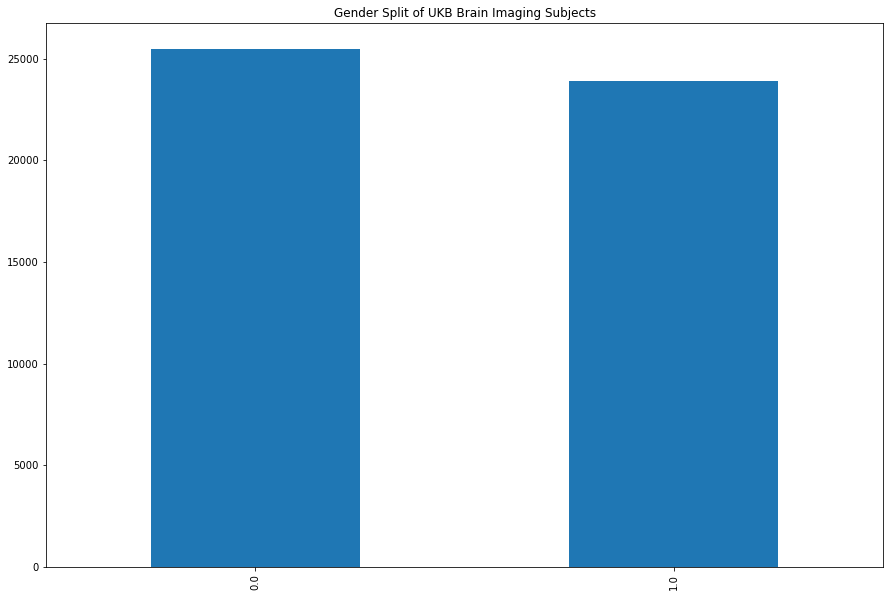

In [26]:
# 0 females
# 1 males
brain_imaging_age_gender_df['31-0.0'].value_counts().plot(kind='bar',title='Gender Split of UKB Brain Imaging Subjects',figsize=[15,10])

In [27]:
brain_imaging_age_gender_df['34-0.0'].describe()

count    49400.000000
mean      1952.780526
std          7.582117
min       1936.000000
25%       1947.000000
50%       1952.000000
75%       1959.000000
max       1970.000000
Name: 34-0.0, dtype: float64

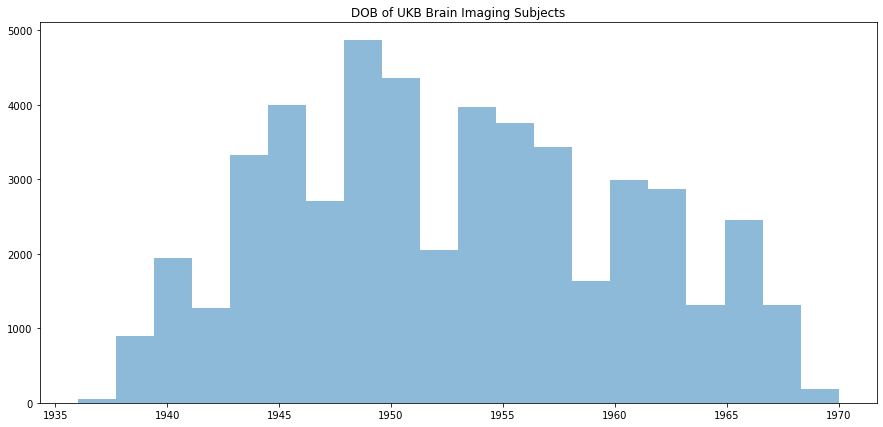

In [121]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]
plt.hist(brain_imaging_age_gender_df['34-0.0'].values, bins=20, alpha=0.5)
plt.title('DOB of UKB Brain Imaging Subjects')
plt.show()

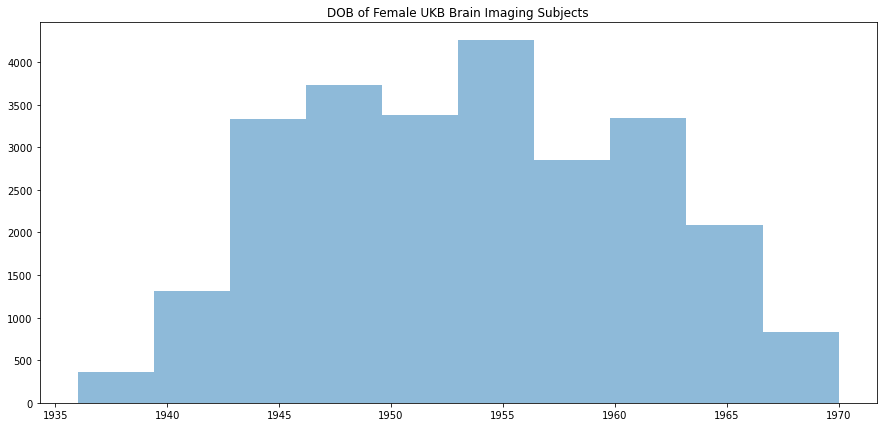

In [29]:
plt.rcParams['figure.figsize'] = [15, 7]
plt.hist(brain_imaging_age_gender_df[brain_imaging_age_gender_df['31-0.0']==0.0]['34-0.0'].values, bins=10, alpha=0.5)
plt.title('DOB of Female UKB Brain Imaging Subjects')
plt.show()

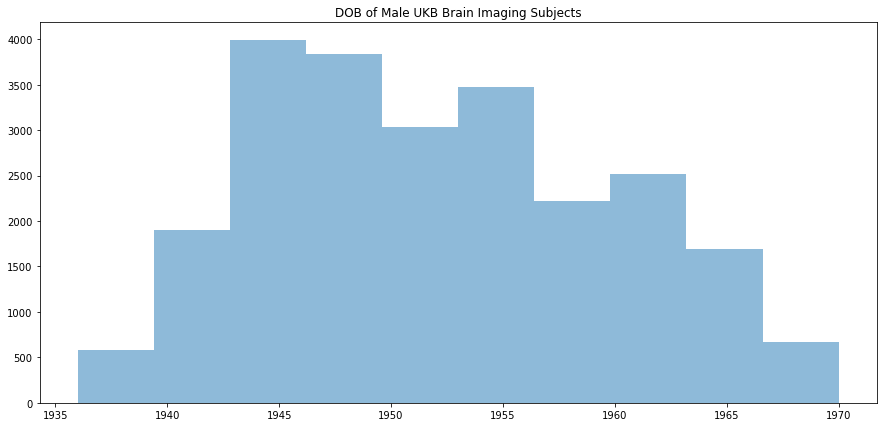

In [30]:
plt.rcParams['figure.figsize'] = [15, 7]
plt.hist(brain_imaging_age_gender_df[brain_imaging_age_gender_df['31-0.0']==1.0]['34-0.0'].values, bins=10, alpha=0.5)
plt.title('DOB of Male UKB Brain Imaging Subjects')
plt.show()

## Mental Health Field IDs

In [122]:
field_ids_df[field_ids_df['Category']=="Mental health"]

,Field ID,Description,Category,Type,field_id_category
672,20126,Bipolar and major depression status,Mental health,NaN,type not available
673,20122,Bipolar disorder status,Mental health,NaN,type not available
1102,4598,Ever depressed for a whole week,Mental health,NaN,type not available
1116,4653,Ever highly irritable/argumentative for 2 days,Mental health,NaN,type not available
1117,4642,Ever manic/hyper for 2 days,Mental health,NaN,type not available
1123,4631,Ever unenthusiastic/disinterested for a whole ...,Mental health,NaN,type not available
1168,4559,Family relationship satisfaction,Mental health,NaN,type not available
1175,1960,Fed-up feelings,Mental health,NaN,type not available
1227,4581,Financial situation satisfaction,Mental health,NaN,type not available
1311,2050,Frequency of depressed mood in last 2 weeks,Mental health,NaN,type not available


In [36]:
mental_health_field_ids=field_ids_df[field_ids_df['Category']=="Mental health"]['Field ID'].values

In [47]:
columns_to_read_for_mental_health_eda=[]
for column_name in new_column_list_1[1:]:
    #print(column_name.split("-")[0])
    if int(column_name.split("-")[0]) in mental_health_field_ids:
        columns_to_read_for_mental_health_eda.append(column_name)

In [51]:
columns_to_read_for_mental_health_eda=[]
for column_name in new_column_list_2[1:]:
    #print(column_name.split("-")[0])
    if int(column_name.split("-")[0]) in mental_health_field_ids:
        columns_to_read_for_mental_health_eda.append(column_name)

In [53]:
columns_to_read_for_mental_health_eda=[]
for column_name in new_column_list_3[1:]:
    #print(column_name.split("-")[0])
    if int(column_name.split("-")[0]) in mental_health_field_ids:
        columns_to_read_for_mental_health_eda.append(column_name)

In [54]:
columns_to_read_for_mental_health_eda

[]

In [81]:
# In all the three new baskets there are no mental health related field ids

## Smoking Habits of UKB Subjects

In [123]:
field_ids_df[field_ids_df['Category']=="Smoking"]

,Field ID,Description,Category,Type,field_id_category
120,3436,Age started smoking in current smokers,Smoking,NaN,type not available
121,2867,Age started smoking in former smokers,Smoking,NaN,type not available
123,2897,Age stopped smoking,Smoking,NaN,type not available
124,6194,Age stopped smoking cigarettes (current cigar/...,Smoking,NaN,type not available
956,1239,Current tobacco smoking,Smoking,NaN,type not available
989,3476,Difficulty not smoking for 1 day,Smoking,NaN,type not available
1118,20160,Ever smoked,Smoking,NaN,type not available
1119,2907,Ever stopped smoking for 6+ months,Smoking,NaN,type not available
1120,10827,Ever stopped smoking for 6+ months (pilot),Smoking,NaN,type not available
1122,3486,Ever tried to stop smoking,Smoking,NaN,type not available


In [65]:
smoking_field_ids=field_ids_df[field_ids_df['Category']=="Smoking"]['Field ID'].values

In [76]:
columns_to_read_for_smoking_eda=[]
for column_name in new_column_list_1[1:]:
    if int(column_name.split("-")[0]) in smoking_field_ids:
        columns_to_read_for_smoking_eda.append(column_name)

In [71]:
columns_to_read_for_smoking_eda

[]

In [77]:
columns_to_read_for_smoking_eda=[]
for column_name in new_column_list_2[1:]:
    if int(column_name.split("-")[0]) in smoking_field_ids:
        columns_to_read_for_smoking_eda.append(column_name)

In [78]:
columns_to_read_for_smoking_eda

[]

In [79]:
columns_to_read_for_smoking_eda=[]
for column_name in new_column_list_3[1:]:
    if int(column_name.split("-")[0]) in smoking_field_ids:
        columns_to_read_for_smoking_eda.append(column_name)

In [80]:
columns_to_read_for_smoking_eda

[]

## Ethnicity of UKB Subjects

In [82]:
ethnicity_df = pd.read_csv("/ocean/projects/asc170022p/tighu/ukb/ukb49570.csv", usecols = ['eid','21000-0.0','21000-1.0','21000-2.0'])

In [83]:
brain_imaging_ethnicity_df=ethnicity_df[ethnicity_df['eid'].isin(subject_ids_having_atleast_one_imaging_vist)]

In [85]:
brain_imaging_ethnicity_df.head(10)

,eid,21000-0.0,21000-1.0,21000-2.0
27,1000286,1003.0,1003.0,NaN
28,1000295,1001.0,NaN,NaN
32,1000335,1001.0,NaN,1001.0
38,1000397,1001.0,NaN,NaN
42,1000432,1001.0,NaN,NaN
57,1000580,1001.0,NaN,NaN
58,1000591,1001.0,NaN,NaN
72,1000730,1001.0,NaN,NaN
87,1000882,1001.0,NaN,NaN
93,1000946,1001.0,NaN,NaN


In [88]:
brain_imaging_ethnicity_df['21000-0.0'].value_counts()

 1001.0    44972
 1003.0     1499
 1002.0     1281
 3001.0      362
 6.0         254
 4001.0      187
 5.0         141
 4002.0      139
-3.0         113
 3002.0       84
 3004.0       83
 2003.0       69
 2004.0       68
 2001.0       53
 2002.0       31
 1.0          28
 3003.0        8
-1.0           6
 4003.0        4
 2.0           3
 3.0           1
Name: 21000-0.0, dtype: int64

In [87]:
age_encoding_dict={"-3.0":"Prefer not to answer",
"-1.0":"Do not know",
"1.0":"White",
"2.0":"Mixed",
"3.0":"Asian or Asian British",
"4.0":"Black or Black British",
"5.0":"Chinese",
"6.0":"Other ethnic group",
"1001.0":"British",
"1002.0":"Irish",
"1003.0":"Any other white background",
"2001.0":"White and Black Caribbean",
"2002.0":"White and Black African",
"2003.0":"White and Asian",
"2004.0":"Any other mixed background",
"3001.0":"Indian",
"3002.0":"Pakistani",
"3003.0":"Bangladeshi",
"3004.0":"Any other Asian background",
"4001.0":"Caribbean",
"4002.0":"African",
"4003.0":"Any other Black background"}

## Early life factors, Medical conditions

In [125]:
field_ids_df[field_ids_df['Category'].isin(["Early life factors"])]

,Field ID,Description,Category,Type,field_id_category
93,1767,Adopted as a child,Early life factors,NaN,type not available
674,20022,Birth weight,Early life factors,NaN,type not available
675,120,Birth weight known,Early life factors,NaN,type not available
695,1677,Breastfed as a baby,Early life factors,NaN,type not available
884,1687,Comparative body size at age 10,Early life factors,NaN,type not available
885,1697,Comparative height size at age 10,Early life factors,NaN,type not available
938,20115,Country of Birth (non-UK origin),Early life factors,NaN,type not available
939,1647,Country of birth (UK/elsewhere),Early life factors,NaN,type not available
1173,146,Father's day of birth,Early life factors,#,restricted data type
1174,115,Father's month of birth,Early life factors,#,restricted data type


In [97]:
medical_condition_field_ids=field_ids_df[field_ids_df['Category'].isin(["Medical conditions"])]['Field ID'].values

early_life_field_ids=field_ids_df[field_ids_df['Category'].isin(["Early life factors"])]['Field ID'].values

In [98]:
columns_to_read_for_medical_conditions=[]
for column_name in new_column_list_1[1:]:
    if int(column_name.split("-")[0]) in medical_condition_field_ids:
        columns_to_read_for_medical_conditions.append(column_name)

In [100]:
columns_to_read_for_early_life=[]
for column_name in new_column_list_1[1:]:
    if int(column_name.split("-")[0]) in early_life_field_ids:
        columns_to_read_for_early_life.append(column_name)

In [101]:
columns_to_read_for_medical_conditions

['134-0.0',
 '134-1.0',
 '134-2.0',
 '134-3.0',
 '135-0.0',
 '135-1.0',
 '135-2.0',
 '135-3.0',
 '2443-0.0',
 '2443-1.0',
 '2443-2.0',
 '2443-3.0',
 '2453-0.0',
 '2453-1.0',
 '2453-2.0',
 '2453-3.0',
 '2463-0.0',
 '2463-1.0',
 '2463-2.0',
 '2463-3.0',
 '2473-0.0',
 '2473-1.0',
 '2473-2.0',
 '2473-3.0',
 '2966-0.0',
 '2966-1.0',
 '2966-2.0',
 '2966-3.0',
 '2976-0.0',
 '2976-1.0',
 '2976-2.0',
 '2976-3.0',
 '2986-0.0',
 '2986-1.0',
 '2986-2.0',
 '2986-3.0',
 '3005-0.0',
 '3005-1.0',
 '3005-2.0',
 '3005-3.0',
 '3140-0.0',
 '3140-1.0',
 '3140-2.0',
 '3140-3.0',
 '3627-0.0',
 '3627-1.0',
 '3627-2.0',
 '3627-3.0',
 '3761-0.0',
 '3761-1.0',
 '3761-2.0',
 '3761-3.0',
 '3786-0.0',
 '3786-1.0',
 '3786-2.0',
 '3786-3.0',
 '3894-0.0',
 '3894-1.0',
 '3894-2.0',
 '3894-3.0',
 '3992-0.0',
 '3992-1.0',
 '3992-2.0',
 '3992-3.0',
 '4012-0.0',
 '4012-1.0',
 '4012-2.0',
 '4012-3.0',
 '4022-0.0',
 '4022-1.0',
 '4022-2.0',
 '4022-3.0',
 '4041-0.0',
 '4041-1.0',
 '4041-2.0',
 '4041-3.0',
 '4056-0.0',
 '4056-

In [102]:
columns_to_read_for_early_life

['120-0.0',
 '120-1.0',
 '120-2.0',
 '129-0.0',
 '129-1.0',
 '129-2.0',
 '130-0.0',
 '130-1.0',
 '130-2.0',
 '1647-0.0',
 '1647-1.0',
 '1647-2.0',
 '1677-0.0',
 '1677-1.0',
 '1677-2.0',
 '1687-0.0',
 '1687-1.0',
 '1687-2.0',
 '1697-0.0',
 '1697-1.0',
 '1697-2.0',
 '1707-0.0',
 '1707-1.0',
 '1707-2.0',
 '1767-0.0',
 '1767-1.0',
 '1767-2.0',
 '1767-3.0',
 '1777-0.0',
 '1777-1.0',
 '1777-2.0',
 '1787-0.0',
 '1787-1.0',
 '1787-2.0',
 '20022-0.0',
 '20022-1.0',
 '20022-2.0',
 '20115-0.0']

In [104]:
early_life_df = pd.read_csv("/ocean/projects/asc170022p/tighu/ukb/ukb49570.csv", usecols = ['eid']+columns_to_read_for_early_life)

In [105]:
brain_imaging_early_life_df=early_life_df[early_life_df['eid'].isin(subject_ids_having_atleast_one_imaging_vist)]

In [106]:
brain_imaging_early_life_df.shape

(49400, 39)

In [107]:
brain_imaging_early_life_df.head(5)

,eid,120-0.0,120-1.0,120-2.0,129-0.0,129-1.0,129-2.0,130-0.0,130-1.0,130-2.0,...,1777-0.0,1777-1.0,1777-2.0,1787-0.0,1787-1.0,1787-2.0,20022-0.0,20022-1.0,20022-2.0,20115-0.0
27,1000286,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,0.0,0.0,NaN,4.00,4.0,NaN,304.0
28,1000295,1.0,NaN,NaN,514500.0,NaN,NaN,428500.0,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,3.18,NaN,NaN,NaN
32,1000335,1.0,NaN,9.0,178500.0,NaN,178500.0,544500.0,NaN,549500.0,...,0.0,NaN,0.0,1.0,NaN,1.0,2.72,NaN,NaN,NaN
38,1000397,1.0,NaN,NaN,523500.0,NaN,NaN,446500.0,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,3.35,NaN,NaN,NaN
42,1000432,1.0,NaN,NaN,295500.0,NaN,NaN,413500.0,NaN,NaN,...,0.0,NaN,NaN,-1.0,NaN,NaN,3.63,NaN,NaN,NaN


In [108]:
field_ids_df[field_ids_df['Category'].isin(["Early life factors"])]

,Field ID,Description,Category,Type,field_id_category
93,1767,Adopted as a child,Early life factors,NaN,type not available
674,20022,Birth weight,Early life factors,NaN,type not available
675,120,Birth weight known,Early life factors,NaN,type not available
695,1677,Breastfed as a baby,Early life factors,NaN,type not available
884,1687,Comparative body size at age 10,Early life factors,NaN,type not available
885,1697,Comparative height size at age 10,Early life factors,NaN,type not available
938,20115,Country of Birth (non-UK origin),Early life factors,NaN,type not available
939,1647,Country of birth (UK/elsewhere),Early life factors,NaN,type not available
1173,146,Father's day of birth,Early life factors,#,restricted data type
1174,115,Father's month of birth,Early life factors,#,restricted data type


In [109]:
#non uk country of births
# 212--> India
# 320--> Germany
# 434--> USA
# 143--> South Africa
# 124--> Kenya
brain_imaging_early_life_df['20115-0.0'].value_counts()

212.0    245
320.0    233
434.0    152
143.0    136
124.0    136
        ... 
208.0      1
606.0      1
329.0      1
138.0      1
135.0      1
Name: 20115-0.0, Length: 137, dtype: int64

In [112]:
#uk country of birth
#1 --> England
#3--> Scotland
#6-->Elsewhere
brain_imaging_early_life_df['1647-0.0'].value_counts()

 1.0    41470
 3.0     3418
 6.0     2872
 2.0      897
 5.0      370
 4.0      346
-3.0       10
-1.0        3
Name: 1647-0.0, dtype: int64

In [115]:
brain_imaging_early_life_df['1647-2.0'].value_counts()

 1.0    10498
 6.0      522
 3.0      272
 2.0      226
 5.0       85
 4.0       62
-3.0        2
Name: 1647-2.0, dtype: int64

In [137]:
brain_imaging_early_life_df[['1707-1.0','1707-0.0','1707-2.0']].head(15)

,1707-1.0,1707-0.0,1707-2.0
27,2.0,2.0,NaN
28,NaN,1.0,NaN
32,NaN,1.0,1.0
38,NaN,1.0,NaN
42,NaN,1.0,NaN
57,NaN,1.0,NaN
58,NaN,2.0,NaN
72,NaN,1.0,NaN
87,NaN,2.0,NaN
93,NaN,1.0,NaN


In [138]:
brain_imaging_early_life_df['1707-1.0'].value_counts()

1.0    7424
2.0     767
3.0     135
Name: 1707-1.0, dtype: int64

In [139]:
brain_imaging_early_life_df['1707-0.0'].value_counts()

 1.0    43952
 2.0     4636
 3.0      789
-3.0        9
Name: 1707-0.0, dtype: int64

In [140]:
brain_imaging_early_life_df['1707-2.0'].value_counts()

 1.0    10356
 2.0     1098
 3.0      210
-3.0        3
Name: 1707-2.0, dtype: int64

## Surrogate AD fields

In [12]:
#Family history
# 20107	Illnesses of father	Family history	NaN	type not available
# 20110	Illnesses of mother	Family history	NaN	type not available
# 20111	Illnesses of siblings
field_ids_df[field_ids_df['Category']=="Family history"]

,Field ID,Description,Category,Type,field_id_category
94,3912,Adopted father still alive,Family history,NaN,type not available
95,3942,Adopted mother still alive,Family history,NaN,type not available
1170,1797,Father still alive,Family history,NaN,type not available
1171,2946,Father's age,Family history,NaN,type not available
1172,1807,Father's age at death,Family history,NaN,type not available
1579,20112,Illnesses of adopted father,Family history,NaN,type not available
1580,20113,Illnesses of adopted mother,Family history,NaN,type not available
1581,20114,Illnesses of adopted siblings,Family history,NaN,type not available
1582,20107,Illnesses of father,Family history,NaN,type not available
1583,20110,Illnesses of mother,Family history,NaN,type not available
